In [1]:
import pandas

df_train = pandas.read_csv('air-passengers-train.csv', index_col=[0])
#df_train.index = pandas.to_datetime(df_train.index, format='%Y-%m')
display(df_train)

df_test = pandas.read_csv('air-passengers-test.csv', index_col=[0])
display(df_test)
print(df_test.shape)

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1958-04,348
1958-05,363
1958-06,435


,#Passengers
Month,
1958-09,404
1958-10,359
1958-11,310
1958-12,337
1959-01,360
1959-02,342
1959-03,406
1959-04,396
1959-05,420


(28, 1)


In [2]:
df_train2 = df_train[['#Passengers']]
df_train2['#Passengers2'] = df_train2['#Passengers']
display(df_train2)

df_test2 = df_test[['#Passengers']]
df_test2['#Passengers2'] = df_test['#Passengers']
display(df_test2)
print(df_test.shape)

,#Passengers,#Passengers2
Month,,
1949-01,112,112
1949-02,118,118
1949-03,132,132
1949-04,129,129
1949-05,121,121
...,...,...
1958-04,348,348
1958-05,363,363
1958-06,435,435


,#Passengers,#Passengers2
Month,,
1958-09,404,404
1958-10,359,359
1958-11,310,310
1958-12,337,337
1959-01,360,360
1959-02,342,342
1959-03,406,406
1959-04,396,396
1959-05,420,420


(28, 1)


In [3]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=df_train2, dates=df_train2.index)
model_fit = model.fit()

/home/diatango_lin/tj_tsai/workspace/infra/ml_scikit/env-0719/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [4]:
y_pred = model_fit.forecast(df_train2.to_numpy(), len(df_test2))
df_pred = pandas.DataFrame(y_pred, index=df_test2.index, columns=df_test2.columns)
df_pred

,#Passengers,#Passengers2
Month,,
1958-09,504.389354,504.389354
1958-10,503.787988,503.787988
1958-11,503.195761,503.195761
1958-12,502.612535,502.612535
1959-01,502.038171,502.038171
1959-02,501.472537,501.472537
1959-03,500.915498,500.915498
1959-04,500.366925,500.366925
1959-05,499.826688,499.826688


In [5]:
df_pred = df_pred[["#Passengers"]]
df_pred

,#Passengers
Month,
1958-09,504.389354
1958-10,503.787988
1958-11,503.195761
1958-12,502.612535
1959-01,502.038171
1959-02,501.472537
1959-03,500.915498
1959-04,500.366925
1959-05,499.826688


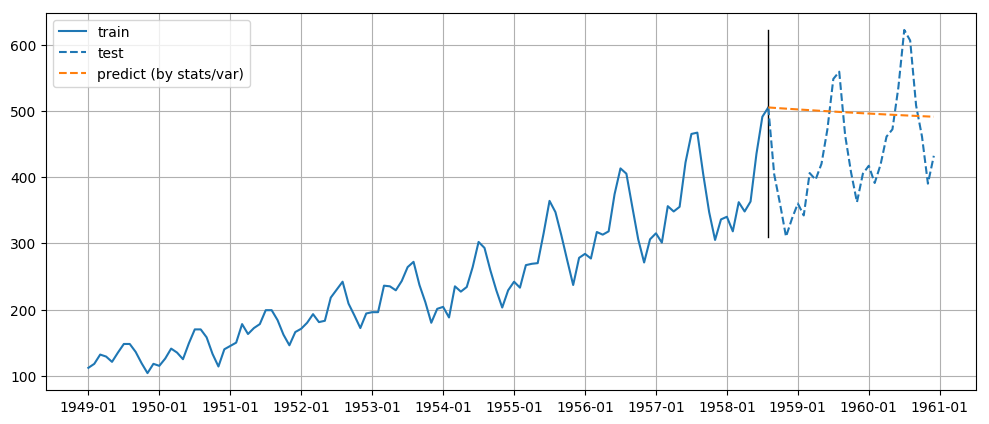

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5), dpi=100)

# training part
plt.plot(df_train[['#Passengers']], color='tab:blue', label='train')

# separating line
plt.plot([df_train.index[-1], df_train.index[-1]],
        [min(df_test[df_train.columns[0]]), max(df_test[df_train.columns[0]])],
        color='black', linewidth=1)

# testing part
x = [df_train.index[-1]]
x.extend(df_test.index)
y = [df_train['#Passengers'].to_numpy()[-1]]
y.extend(df_test['#Passengers'].to_numpy())
plt.plot(x, y, color='tab:blue', linestyle='dashed', label='test')

# predicting part
x = [df_train.index[-1]]
x.extend(df_pred.index)
y = [df_train['#Passengers'].to_numpy()[-1]]
y.extend(df_pred['#Passengers'].to_numpy())
plt.plot(x, y, color='tab:orange', linestyle='dashed', label='predict (by stats/var)')


plt.xticks([str(y) + '-01' for y in range(1949, 1962)])
plt.legend()
plt.grid()
plt.show()

In [7]:
from sklearn.metrics import r2_score, mean_squared_error

print('predict:')
print(' - R2:', round(r2_score(df_test, df_pred), 6))
print(' - MSE:', round(mean_squared_error(df_test, df_pred, squared=True), 6))
print(' - RMSE:', round(mean_squared_error(df_test, df_pred, squared=False), 6))


predict:
 - R2: -0.626942
 - MSE: 10034.516042
 - RMSE: 100.172432
